<a href="https://colab.research.google.com/github/yue-zhongqi/cartpole_colab/blob/main/cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial and Sample Code for Balancing a Pole on a Cart

## Installing dependencies:

## Importing dependencies and define helper functions

In [ ]:
import gymnasium
from gymnasium.wrappers import RecordVideo
from gymnasium import logger as gymlogger

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline 

import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

# Set gym logger level to show only errors
import logging
# gymlogger.setLevel(logging.ERROR)

# # Function to display a recorded video from the 'video/' directory
# def show_video():
#     mp4list = glob.glob('video/*.mp4')
#     if len(mp4list) > 0:
#         mp4 = mp4list[0]
#         video = io.open(mp4, 'r+b').read()
#         encoded = base64.b64encode(video).decode('ascii')
#         display_html = f'''
#         <video alt="Recorded video" autoplay loop controls style="height: 400px;">
#             <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
#         </video>
#         '''
#         ipythondisplay.display(HTML(display_html))
#     else: 
#         print("⚠️ Could not find any video in the 'video/' folder.")


## Tutorial: Loading CartPole environment

In [2]:
env = gymnasium.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [3]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [4]:
print(env.observation_space)

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [5]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: (array([-0.0007026 ,  0.04979075, -0.02502081, -0.02978802], dtype=float32), {})


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [6]:
# observation, reward, done, info = env.step(0)
# print("New observations after choosing action 0:", observation)
# print("Reward for this step:", reward)
# print("Is this round done?", done)
observation, reward, terminated, truncated, info = env.step(0)
done = terminated or truncated

print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Done?", done)


New observations after choosing action 0: [ 0.00029321 -0.14496362 -0.02561657  0.25489676]
Reward for this step: 1.0
Done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [7]:
# observation = env.reset()
# cumulative_reward = 0
# done = False
# while not done:
#     observation, reward, done, info = env.step(0)
#     cumulative_reward += reward
# print("Cumulative reward for this round:", cumulative_reward)
observation, info = env.reset()
cumulative_reward = 0
terminated = False
truncated = False

while not (terminated or truncated):
    observation, reward, terminated, truncated, info = env.step(0)
    cumulative_reward += reward

print("Cumulative reward for this round:", cumulative_reward)


Cumulative reward for this round: 9.0


## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [8]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

For Task 1, we can show the observation and chosen action below:

In [9]:
observation = env.reset()
action = rand_policy_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: (array([-0.00179189, -0.04275095, -0.01158009,  0.01493058], dtype=float32), {})
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

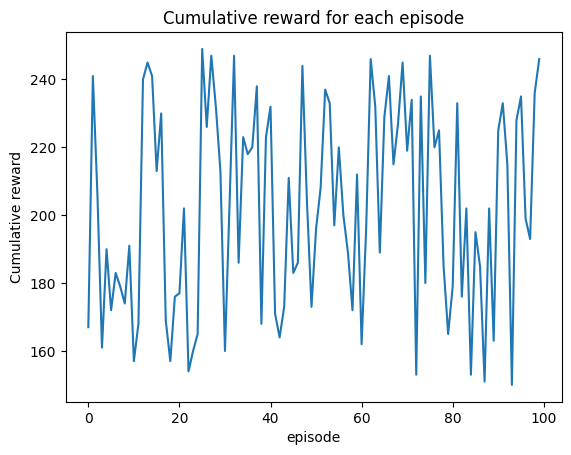

In [10]:
episode_results = np.random.randint(150, 250, size=100)
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

Print the average reward over the 100 episodes.

In [17]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 202.2
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [19]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import random

# Create environment with correct render mode
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Wrap it to record video
env = RecordVideo(env, video_folder="./video")

# Reset environment and unpack the new return format
observation, info = env.reset()

cumulative_reward = 0
terminated = False
truncated = False

while not (terminated or truncated):
    env.render()  # Optional in render_mode="rgb_array", mostly needed if you use human mode
    action = env.action_space.sample()  # Replace with your policy if needed
    observation, reward, terminated, truncated, info = env.step(action)
    cumulative_reward += reward

env.close()

print("Cumulative reward:", cumulative_reward)

# Show video if you're in Jupyter
show_video()


Cumulative reward: 19.0


NameError: name 'show_video' is not defined